## Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading model

In [2]:
dataRaw = pd.read_csv('./data/china_gdp.csv')
dataRaw.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


## Ploting the dataset

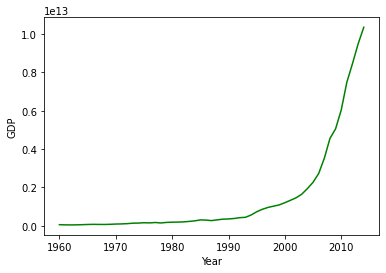

In [3]:
x_data, y_data = dataRaw['Year'].values, dataRaw['Value'].values
plt.plot(x_data, y_data, color='green')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Creating the models

Based on the graph, we can asume that the graph represents a exponencial function, so that's what we'll use to make our model

In [4]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

#### Let's look if this function represents our data

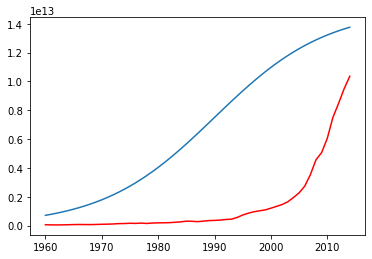

In [5]:
b1 = 0.10
b2 = 1990.0

y_predict_test = sigmoid(x_data, b1, b2)
plt.plot(x_data, y_predict_test*15000000000000) # Blue line is predicted line
plt.plot(x_data, y_data, color='red') # Red line is the real data
plt.show()

Let's now try to make our predicted graph look more like the real data

First we normalize our data

In [6]:
x_data_normalized = x_data / max(x_data)
y_data_normalized = y_data / max(y_data)

Now, we'll use a function from scipy called curve_fit, that tries to match our data and our sigmoid function

In [7]:
from scipy.optimize import curve_fit

params_opt, params_curve = curve_fit(sigmoid, x_data_normalized, y_data_normalized)

print('B1: {:.2f}, B2: {:.2f}'.format( params_opt[0], params_opt[1] ))

B1: 690.45, B2: 1.00


## Ploting the regression model

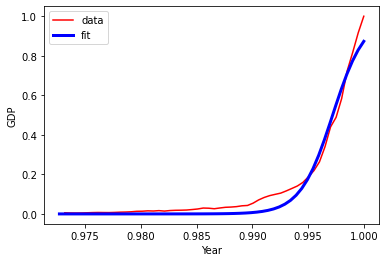

In [8]:
graph_x = np.linspace(1960, 2015, 55)
graph_x = graph_x/max(graph_x) # To normalize it
graph_y = sigmoid(graph_x, *params_opt)
plt.plot(x_data_normalized, y_data_normalized, color='red', label='data')
plt.plot(graph_x, graph_y, linewidth=3, color='blue', label='fit')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Accuracy

### Train and test datasets

In [9]:
mask = np.random.rand(len(dataRaw)) < 0.8
train_x = x_data_normalized[mask]
test_x = x_data_normalized[~mask]
train_y = y_data_normalized[mask]
test_y = y_data_normalized[~mask]

### Build the models and predict

In [10]:
params_opt_accuracy, params_curve_accuracy = curve_fit(sigmoid, train_x, train_y)

y_predict = sigmoid(test_x, *params_opt_accuracy)

### Finally, we evaluate

In [11]:
from sklearn.metrics import r2_score
print('Mean absolute error: {:.2f}'.format( np.mean(np.absolute(y_predict - test_y)) ))
print('Residual sum of squares: {:.2f}'.format( np.mean(y_predict - test_y) ** 2 ))
print('R2 Score: {:.4f}'.format( r2_score(y_predict, test_y) ))

Mean absolute error: 0.01
Residual sum of squares: 0.00
R2 Score: 0.9927
